<a id="data-source"></a>
## Feature Engineering - Employment Growth and Office Real Estate Values  

Judy Chen

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') 

**Load preprocessed dataset**

In [3]:
Preprocessed_df=pd.read_excel('/Users/chenmouse/Desktop/GA-Folder/JudyChenGA0316/JC0316/GA Final Project/Preprocessed.xlsx')

**EDA notebook:**<br>
https://github.com/jchen9619/Employment-Growth-and-Office-Property-Values/blob/master/EDA%20-%20Employment%20Growth%20and%20Office%20Property%20Values.ipynb

Given that preprocessed dataset, **Combined2**, yields weak correlations between feastures and output variables, we explore feature engineering options by first examining the **distribution of data**:

Distribution of Features


<AxesSubplot:xlabel='A_MEDIAN', ylabel='Count'>

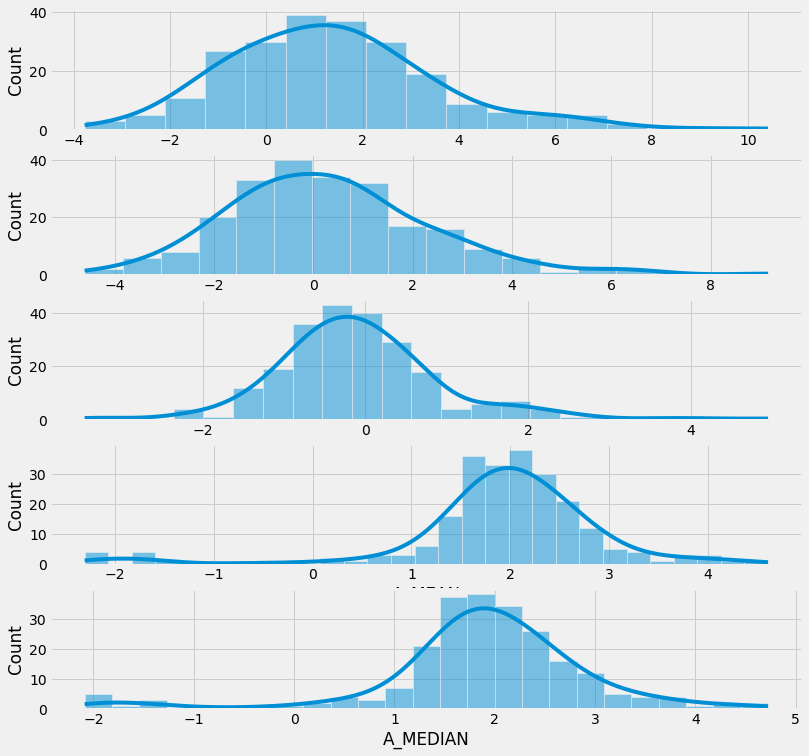

In [18]:
print("Distribution of Features")
fig, axs = plt.subplots(5,1, figsize=(12,12))
sns.histplot(data=Preprocessed_df, x="TOT_EMP", kde=True, ax=axs[0])
sns.histplot(data=Preprocessed_df, x="JOBS_1000", kde=True, ax=axs[1])
sns.histplot(data=Preprocessed_df, x="LOC_QUOTIENT", kde=True, ax=axs[2])
sns.histplot(data=Preprocessed_df, x="A_MEAN", kde=True, ax=axs[3])
sns.histplot(data=Preprocessed_df, x="A_MEDIAN", kde=True, ax=axs[4])

Distribution of Output Variables


<AxesSubplot:xlabel='Office Total Return (%)', ylabel='Count'>

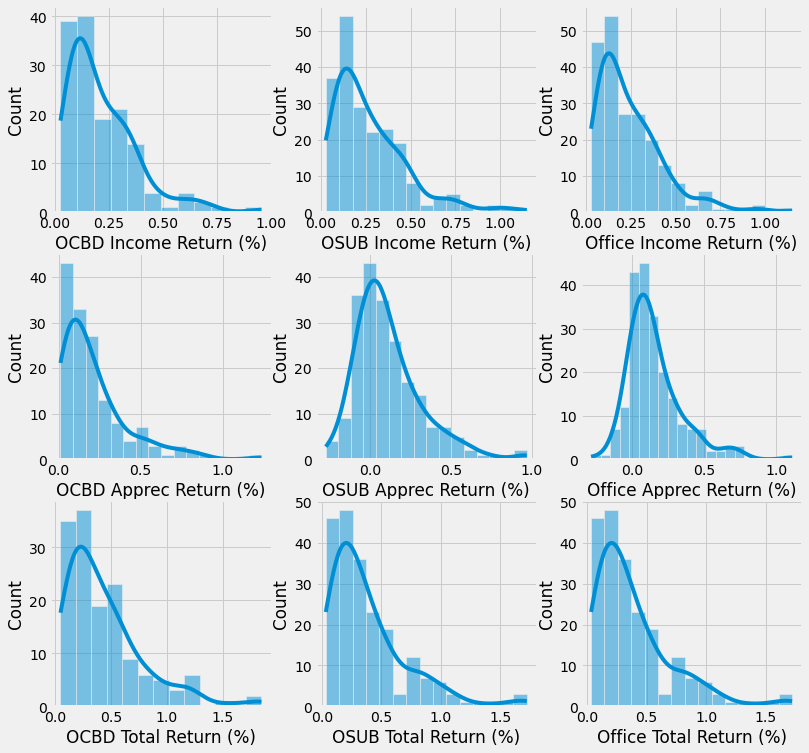

In [19]:
print("Distribution of Output Variables")
fig, axs = plt.subplots(3,3, figsize=(12,12))
sns.histplot(data=Preprocessed_df, x="OCBD Income Return (%)", kde=True, ax=axs[0,0])
sns.histplot(data=Preprocessed_df, x="OSUB Income Return (%)", kde=True, ax=axs[0,1])
sns.histplot(data=Preprocessed_df, x="Office Income Return (%)", kde=True, ax=axs[0,2])
sns.histplot(data=Preprocessed_df, x="OCBD Apprec Return (%)", kde=True, ax=axs[1,0])
sns.histplot(data=Preprocessed_df, x="OSUB Apprec Return (%)", kde=True, ax=axs[1,1])
sns.histplot(data=Preprocessed_df, x="Office Apprec Return (%)", kde=True, ax=axs[1,2])
sns.histplot(data=Preprocessed_df, x="OCBD Total Return (%)", kde=True, ax=axs[2,0])
sns.histplot(data=Preprocessed_df, x="OSUB Total Return (%)", kde=True, ax=axs[2,1])
sns.histplot(data=Preprocessed_df, x="Office Total Return (%)", kde=True, ax=axs[2,2])

It appears all five potential feature variables are either skewed to the left or right, and all Office returns are significantly left-skewed. Therefore, I explored the following combinations of transformation on the underlying data:
 - log transforming features
 - log transforming output variables
 - log transforming both features and output variables
 - square root transformation on features
 - square root transformation on output variables
 - square root transformation on both features and output variables
 
Fitting the 9 output variables (original and after the two tranformations), **the best model is produced when both features and output variables are log-transformed, as evidenced by the most significantly improved correlation between features and output variables.**

In [7]:
cols=['MSA-OCC','TOT_EMP','JOBS_1000','LOC_QUOTIENT','A_MEAN','A_MEDIAN','OCBD Income Return (%)','OSUB Income Return (%)','Office Income Return (%)','OCBD Apprec Return (%)','OSUB Apprec Return (%)','Office Apprec Return (%)','OCBD Total Return (%)','OSUB Total Return (%)','Office Total Return (%)']

In [8]:
logX = Preprocessed_df[cols[1:6]].apply(lambda x: np.log(x))

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
logY = Preprocessed_df[cols[6:]].apply(lambda x: np.log(x))

In [10]:
Combined_logXY = pd.concat([Preprocessed_df.iloc[:, 0:1],logX, logY], axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'TOT_EMP'),
  Text(1.5, 0, 'JOBS_1000'),
  Text(2.5, 0, 'LOC_QUOTIENT'),
  Text(3.5, 0, 'A_MEAN'),
  Text(4.5, 0, 'A_MEDIAN'),
  Text(5.5, 0, 'OCBD Income Return (%)'),
  Text(6.5, 0, 'OSUB Income Return (%)'),
  Text(7.5, 0, 'Office Income Return (%)'),
  Text(8.5, 0, 'OCBD Apprec Return (%)'),
  Text(9.5, 0, 'OSUB Apprec Return (%)'),
  Text(10.5, 0, 'Office Apprec Return (%)'),
  Text(11.5, 0, 'OCBD Total Return (%)'),
  Text(12.5, 0, 'OSUB Total Return (%)'),
  Text(13.5, 0, 'Office Total Return (%)')])

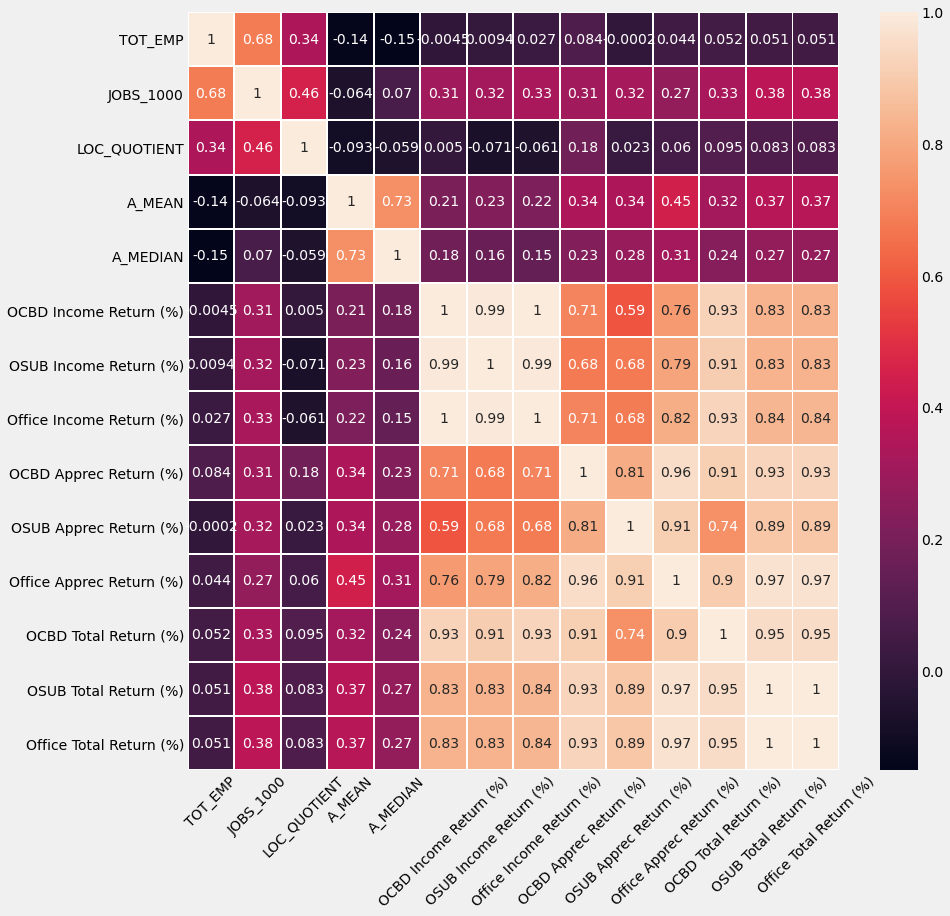

In [20]:
plt.subplots(figsize=(13,13))
corr_logXY = sns.heatmap(Combined_logXY.corr(), annot=True, fmt='.2g', linewidth=1)
plt.xticks(rotation=45)

Export log-transformed dataset that excludes missing values (from variables that originally had negative growth/returns and could not be log-transformed):

In [11]:
Combined_logXY_noNAFeatures=Combined_logXY[Combined_logXY['TOT_EMP'].notnull()
                                          &Combined_logXY['JOBS_1000'].notnull()
                                          &Combined_logXY['LOC_QUOTIENT'].notnull()
                                          &Combined_logXY['A_MEAN'].notnull()
                                          &Combined_logXY['A_MEDIAN'].notnull()]

In [12]:
#droping the 1 entry where LOC_QUOTIENT contains negative infinive
Combined_logXY_noNAFeatures.drop([172], inplace=True) 

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
Combined_logXY_noNAFeatures.to_excel(r'/Users/chenmouse/Desktop/GA-Folder/JudyChenGA0316/JC0316/GA Final Project/PostLogTransform.xlsx', index = False)

With the improved dataset, we will explore some individual relationships between pairs of potential features and output variables:

 <font size ='4'> <code style="background:grey;color:black">JOBS_1000</code> vs. all office returns:

<AxesSubplot:xlabel='JOBS_1000', ylabel='Office Total Return (%)'>

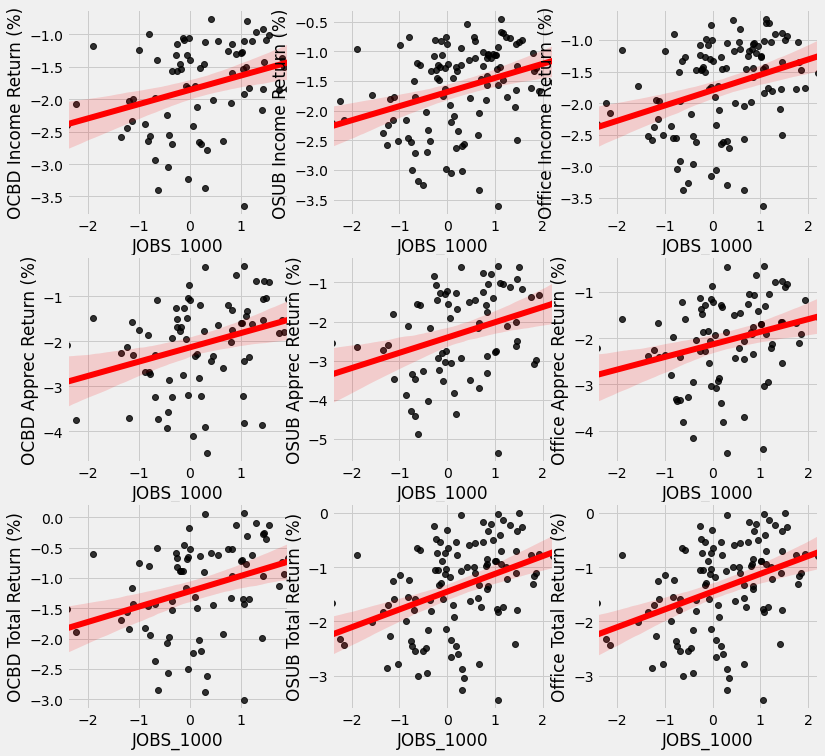

In [21]:
fig, axs = plt.subplots(3,3, figsize=(12,12))
sns.regplot(x="JOBS_1000", y="OCBD Income Return (%)",data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,0])
sns.regplot(x="JOBS_1000", y="OSUB Income Return (%)", data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,1])
sns.regplot(x="JOBS_1000", y="Office Income Return (%)",data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,2])
sns.regplot(x="JOBS_1000", y="OCBD Apprec Return (%)", data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,0])
sns.regplot(x="JOBS_1000", y="OSUB Apprec Return (%)",data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,1])
sns.regplot(x="JOBS_1000", y="Office Apprec Return (%)",data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,2])
sns.regplot(x="JOBS_1000", y="OCBD Total Return (%)",data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,0])
sns.regplot(x="JOBS_1000", y="OSUB Total Return (%)",data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,1])
sns.regplot(x="JOBS_1000", y="Office Total Return (%)",data=Combined_logXY, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,2])

 <font size ='4'> <code style="background:grey;color:black">A_MEAN</code> vs. all office returns:

<AxesSubplot:xlabel='A_MEAN', ylabel='Office Total Return (%)'>

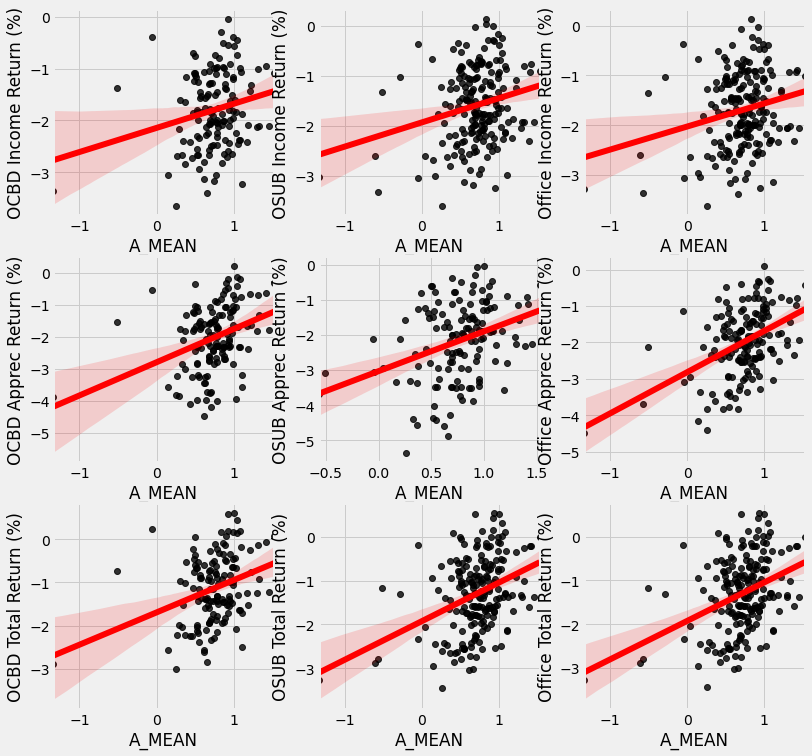

In [22]:
fig, axs = plt.subplots(3,3, figsize=(12,12))
sns.regplot(data=Combined_logXY, x="A_MEAN", y="OCBD Income Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,0])
sns.regplot(data=Combined_logXY, x="A_MEAN", y="OSUB Income Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,1])
sns.regplot(data=Combined_logXY, x="A_MEAN", y="Office Income Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,2])
sns.regplot(data=Combined_logXY, x="A_MEAN", y="OCBD Apprec Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,0])
sns.regplot(data=Combined_logXY, x="A_MEAN", y="OSUB Apprec Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,1])
sns.regplot(data=Combined_logXY, x="A_MEAN", y="Office Apprec Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,2])
sns.regplot(data=Combined_logXY, x="A_MEAN", y="OCBD Total Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,0])
sns.regplot(data=Combined_logXY, x="A_MEAN", y="OSUB Total Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,1])
sns.regplot(data=Combined_logXY, x="A_MEAN", y="Office Total Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,2])

 <font size ='4'> <code style="background:grey;color:black">A_MEDIAN</code> vs. all office returns:

<AxesSubplot:xlabel='A_MEDIAN', ylabel='Office Total Return (%)'>

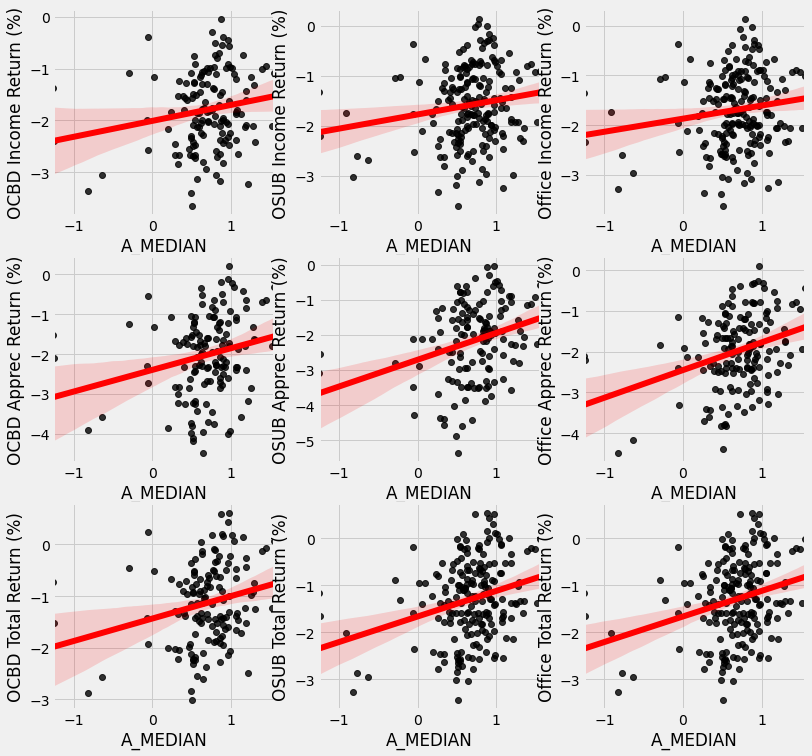

In [23]:
fig, axs = plt.subplots(3,3, figsize=(12,12))
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="OCBD Income Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,0])
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="OSUB Income Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,1])
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="Office Income Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[0,2])
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="OCBD Apprec Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,0])
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="OSUB Apprec Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,1])
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="Office Apprec Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[1,2])
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="OCBD Total Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,0])
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="OSUB Total Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,1])
sns.regplot(data=Combined_logXY, x="A_MEDIAN", y="Office Total Return (%)",scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=axs[2,2])

At first glance, it appears **<u>A_MEAN</u> and <u>A_MEDIAN</u> have more linear relationships with the various types of office returns.** These two features will be further explored in the modeling section.